In [1]:
!ls
import os
print(os.curdir)
os.chdir("drive/My Drive/S9")
!pwd


drive  sample_data
.
/content/drive/My Drive/S9


# New Section

In [2]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [2]:
# from resnet import ResNet18
from model import resnet #import ResNet18
import data_loader
import torch.optim as optim
import random_dataset_ploot
import training
import torch
import torchvision
import torchvision.transforms as transforms
from torchsummary import summary
from model import gradcam
import random_dataset_ploot
import importlib
from lr_finder import LRFinder
import torch.nn as nn
importlib.reload(data_loader)

trainloader,testloader,classes = data_loader.data_loader_cifar()
model = resnet.ResNet18()



  pip install torch-lr-finder -v --global-option="amp"


Extracting ./data/cifar-10-python.tar.gz to ./data
Files already downloaded and verified


  dog plane  deer  ship


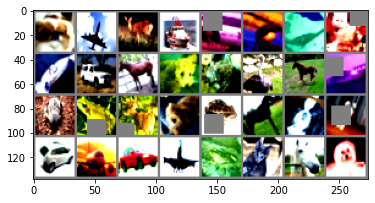

In [3]:
  classes = ('plane', 'car', 'bird', 'cat',
            'deer', 'dog', 'frog', 'horse', 'ship', 'truck')
random_dataset_ploot.plot_random(trainloader,classes)

Stopping early, the loss has diverged
Learning rate search finished. See the graph with {finder_name}.plot()


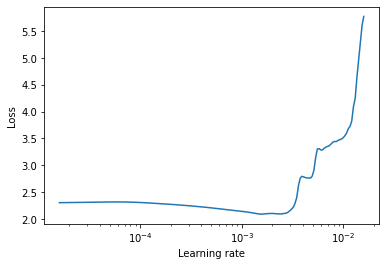

In [5]:
# lr_finder.reset()
criterion = nn.CrossEntropyLoss()
optimizer = optim.SGD(model.parameters(), lr=0.001,momentum = 0.9, weight_decay=1e-2)
lr_finder = LRFinder(model, optimizer, criterion, device="cuda")
lr_finder.range_test(trainloader, val_loader=testloader, start_lr=1e-5, end_lr=2,
                     num_iter=len(testloader), step_mode="exp")
# lr_finder.range_test(trainloader,start_lr= 0.00001, end_lr=1, num_iter=len(testloader), step_mode="exp")
lr_finder.plot()
best_loss = lr_finder.best_loss
best_lr = lr_finder.history["lr"][lr_finder.history["loss"].index(best_loss)]


In [0]:
print(best_loss,best_lr)

In [4]:

use_cuda = torch.cuda.is_available()
device = torch.device("cuda" if use_cuda else "cpu")
if device == 'cuda':
    net = torch.nn.DataParallel(net)
    cudnn.benchmark = True

model = model.to(device)
summary(model, input_size=(3, 32, 32))


----------------------------------------------------------------
        Layer (type)               Output Shape         Param #
            Conv2d-1           [-1, 64, 32, 32]           1,728
       BatchNorm2d-2           [-1, 64, 32, 32]             128
            Conv2d-3           [-1, 64, 32, 32]          36,864
       BatchNorm2d-4           [-1, 64, 32, 32]             128
            Conv2d-5           [-1, 64, 32, 32]          36,864
       BatchNorm2d-6           [-1, 64, 32, 32]             128
        BasicBlock-7           [-1, 64, 32, 32]               0
            Conv2d-8           [-1, 64, 32, 32]          36,864
       BatchNorm2d-9           [-1, 64, 32, 32]             128
           Conv2d-10           [-1, 64, 32, 32]          36,864
      BatchNorm2d-11           [-1, 64, 32, 32]             128
       BasicBlock-12           [-1, 64, 32, 32]               0
           Conv2d-13          [-1, 128, 16, 16]          73,728
      BatchNorm2d-14          [-1, 128,


from torch.optim.lr_scheduler import StepLR
import torch.optim as optim
model =  nn1.to(device)
optimizer = optim.SGD(nn1.parameters(), lr=0.001, momentum=0.9, weight_decay=5e-4)
scheduler = StepLR(optimizer, step_size=5, gamma=0.01)


EPOCHS = 30
for epoch in range(EPOCHS):
    print("EPOCH:", epoch)
    training.train(model, device, trainloader, optimizer, epoch)
    # scheduler.step()
    training.test(model, device, testloader)



# New Section

In [5]:
from torch.optim.lr_scheduler import StepLR,ReduceLROnPlateau
import torch.optim as optim
importlib.reload(training)
model =  model.to(device)
optimizer = optim.SGD(model.parameters(), lr=.002, momentum=0.9, weight_decay=5e-4)
# scheduler = StepLR(optimizer, step_size=10, gamma=0.01)
scheduler = ReduceLROnPlateau(optimizer, mode="min", factor=0.1, patience=3,
                              verbose=True, min_lr=1e-5)

train_accuracy = []
test_accuracy = []
EPOCHS = 50
for epoch in range(EPOCHS):
    print("EPOCH:", epoch)
    training.train(model, device, trainloader, optimizer, epoch,train_accuracy)
    # scheduler.step()
    
    training.test(model, device, testloader,test_accuracy)
    


  0%|          | 0/1563 [00:00<?, ?it/s]

EPOCH: 0


Loss=0.5540000200271606 Batch_id=1562 Accuracy=47.83: 100%|██████████| 1563/1563 [01:20<00:00, 19.39it/s]
  0%|          | 0/1563 [00:00<?, ?it/s]


Test set: Average loss: 0.0309, Accuracy: 6489/10000 (64.89%)

EPOCH: 1


Loss=0.7762079834938049 Batch_id=1562 Accuracy=65.11: 100%|██████████| 1563/1563 [01:20<00:00, 19.34it/s]
  0%|          | 0/1563 [00:00<?, ?it/s]


Test set: Average loss: 0.0246, Accuracy: 7302/10000 (73.02%)

EPOCH: 2


Loss=0.5709280967712402 Batch_id=1562 Accuracy=71.42: 100%|██████████| 1563/1563 [01:22<00:00, 19.02it/s]
  0%|          | 0/1563 [00:00<?, ?it/s]


Test set: Average loss: 0.0227, Accuracy: 7570/10000 (75.70%)

EPOCH: 3


Loss=1.2122511863708496 Batch_id=1562 Accuracy=74.99: 100%|██████████| 1563/1563 [01:22<00:00, 18.96it/s]
  0%|          | 0/1563 [00:00<?, ?it/s]


Test set: Average loss: 0.0178, Accuracy: 8071/10000 (80.71%)

EPOCH: 4


Loss=0.5566633343696594 Batch_id=1562 Accuracy=77.63: 100%|██████████| 1563/1563 [01:22<00:00, 18.88it/s]
  0%|          | 0/1563 [00:00<?, ?it/s]


Test set: Average loss: 0.0186, Accuracy: 7981/10000 (79.81%)

EPOCH: 5


Loss=0.7537267804145813 Batch_id=1562 Accuracy=79.57: 100%|██████████| 1563/1563 [01:22<00:00, 18.91it/s]
  0%|          | 0/1563 [00:00<?, ?it/s]


Test set: Average loss: 0.0162, Accuracy: 8228/10000 (82.28%)

EPOCH: 6


Loss=1.023502230644226 Batch_id=1562 Accuracy=81.15: 100%|██████████| 1563/1563 [01:23<00:00, 18.82it/s]
  0%|          | 0/1563 [00:00<?, ?it/s]


Test set: Average loss: 0.0156, Accuracy: 8299/10000 (82.99%)

EPOCH: 7


Loss=0.3561879098415375 Batch_id=1562 Accuracy=82.66: 100%|██████████| 1563/1563 [01:22<00:00, 19.02it/s]
  0%|          | 0/1563 [00:00<?, ?it/s]


Test set: Average loss: 0.0139, Accuracy: 8491/10000 (84.91%)

EPOCH: 8


Loss=0.43046101927757263 Batch_id=1562 Accuracy=83.90: 100%|██████████| 1563/1563 [01:22<00:00, 18.92it/s]
  0%|          | 0/1563 [00:00<?, ?it/s]


Test set: Average loss: 0.0147, Accuracy: 8451/10000 (84.51%)

EPOCH: 9


Loss=0.8425491452217102 Batch_id=1562 Accuracy=84.76: 100%|██████████| 1563/1563 [01:22<00:00, 18.89it/s]
  0%|          | 0/1563 [00:00<?, ?it/s]


Test set: Average loss: 0.0134, Accuracy: 8559/10000 (85.59%)

EPOCH: 10


Loss=0.6462306380271912 Batch_id=1562 Accuracy=85.66: 100%|██████████| 1563/1563 [01:22<00:00, 19.02it/s]
  0%|          | 0/1563 [00:00<?, ?it/s]


Test set: Average loss: 0.0142, Accuracy: 8470/10000 (84.70%)

EPOCH: 11


Loss=0.5625750422477722 Batch_id=1562 Accuracy=86.19: 100%|██████████| 1563/1563 [01:22<00:00, 18.93it/s]
  0%|          | 0/1563 [00:00<?, ?it/s]


Test set: Average loss: 0.0146, Accuracy: 8461/10000 (84.61%)

EPOCH: 12


Loss=0.547714114189148 Batch_id=1562 Accuracy=87.03: 100%|██████████| 1563/1563 [01:22<00:00, 18.99it/s]
  0%|          | 0/1563 [00:00<?, ?it/s]


Test set: Average loss: 0.0125, Accuracy: 8682/10000 (86.82%)

EPOCH: 13


Loss=0.9195330142974854 Batch_id=1562 Accuracy=87.44: 100%|██████████| 1563/1563 [01:22<00:00, 18.88it/s]
  0%|          | 0/1563 [00:00<?, ?it/s]


Test set: Average loss: 0.0122, Accuracy: 8670/10000 (86.70%)

EPOCH: 14


Loss=0.39926981925964355 Batch_id=1562 Accuracy=88.19: 100%|██████████| 1563/1563 [01:22<00:00, 18.91it/s]
  0%|          | 0/1563 [00:00<?, ?it/s]


Test set: Average loss: 0.0121, Accuracy: 8691/10000 (86.91%)

EPOCH: 15


Loss=0.14432767033576965 Batch_id=1562 Accuracy=88.86: 100%|██████████| 1563/1563 [01:22<00:00, 18.87it/s]
  0%|          | 0/1563 [00:00<?, ?it/s]


Test set: Average loss: 0.0114, Accuracy: 8791/10000 (87.91%)

EPOCH: 16


Loss=0.2823571562767029 Batch_id=1562 Accuracy=89.21: 100%|██████████| 1563/1563 [01:22<00:00, 18.87it/s]
  0%|          | 0/1563 [00:00<?, ?it/s]


Test set: Average loss: 0.0115, Accuracy: 8770/10000 (87.70%)

EPOCH: 17


Loss=0.41166192293167114 Batch_id=1562 Accuracy=89.74: 100%|██████████| 1563/1563 [01:22<00:00, 18.98it/s]
  0%|          | 0/1563 [00:00<?, ?it/s]


Test set: Average loss: 0.0105, Accuracy: 8856/10000 (88.56%)

EPOCH: 18


Loss=0.22194291651248932 Batch_id=1562 Accuracy=90.25: 100%|██████████| 1563/1563 [01:22<00:00, 18.87it/s]
  0%|          | 0/1563 [00:00<?, ?it/s]


Test set: Average loss: 0.0106, Accuracy: 8880/10000 (88.80%)

EPOCH: 19


Loss=0.338295042514801 Batch_id=1562 Accuracy=90.56: 100%|██████████| 1563/1563 [01:22<00:00, 18.95it/s]
  0%|          | 0/1563 [00:00<?, ?it/s]


Test set: Average loss: 0.0110, Accuracy: 8866/10000 (88.66%)

EPOCH: 20


Loss=0.11839663982391357 Batch_id=1562 Accuracy=91.01: 100%|██████████| 1563/1563 [01:22<00:00, 18.89it/s]
  0%|          | 0/1563 [00:00<?, ?it/s]


Test set: Average loss: 0.0109, Accuracy: 8873/10000 (88.73%)

EPOCH: 21


Loss=0.511390209197998 Batch_id=1562 Accuracy=91.40: 100%|██████████| 1563/1563 [01:22<00:00, 18.86it/s]
  0%|          | 0/1563 [00:00<?, ?it/s]


Test set: Average loss: 0.0107, Accuracy: 8865/10000 (88.65%)

EPOCH: 22


Loss=0.30560868978500366 Batch_id=1562 Accuracy=91.27: 100%|██████████| 1563/1563 [01:22<00:00, 18.91it/s]
  0%|          | 0/1563 [00:00<?, ?it/s]


Test set: Average loss: 0.0106, Accuracy: 8895/10000 (88.95%)

EPOCH: 23


Loss=0.12715063989162445 Batch_id=1562 Accuracy=91.64: 100%|██████████| 1563/1563 [01:22<00:00, 18.88it/s]
  0%|          | 0/1563 [00:00<?, ?it/s]


Test set: Average loss: 0.0107, Accuracy: 8896/10000 (88.96%)

EPOCH: 24


Loss=0.2876181900501251 Batch_id=1562 Accuracy=91.95: 100%|██████████| 1563/1563 [01:22<00:00, 18.94it/s]
  0%|          | 0/1563 [00:00<?, ?it/s]


Test set: Average loss: 0.0104, Accuracy: 8957/10000 (89.57%)

EPOCH: 25


Loss=0.13685019314289093 Batch_id=1562 Accuracy=92.22: 100%|██████████| 1563/1563 [01:22<00:00, 18.87it/s]
  0%|          | 0/1563 [00:00<?, ?it/s]


Test set: Average loss: 0.0111, Accuracy: 8836/10000 (88.36%)

EPOCH: 26


Loss=0.1766640990972519 Batch_id=1562 Accuracy=92.53: 100%|██████████| 1563/1563 [01:22<00:00, 18.92it/s]
  0%|          | 0/1563 [00:00<?, ?it/s]


Test set: Average loss: 0.0114, Accuracy: 8857/10000 (88.57%)

EPOCH: 27


Loss=0.1519697904586792 Batch_id=1562 Accuracy=92.83: 100%|██████████| 1563/1563 [01:22<00:00, 18.90it/s]
  0%|          | 0/1563 [00:00<?, ?it/s]


Test set: Average loss: 0.0101, Accuracy: 8998/10000 (89.98%)

EPOCH: 28


Loss=0.01455754041671753 Batch_id=1562 Accuracy=92.79: 100%|██████████| 1563/1563 [01:22<00:00, 18.95it/s]
  0%|          | 0/1563 [00:00<?, ?it/s]


Test set: Average loss: 0.0107, Accuracy: 8920/10000 (89.20%)

EPOCH: 29


Loss=0.2343505322933197 Batch_id=1562 Accuracy=92.83: 100%|██████████| 1563/1563 [01:23<00:00, 18.79it/s]
  0%|          | 0/1563 [00:00<?, ?it/s]


Test set: Average loss: 0.0100, Accuracy: 8944/10000 (89.44%)

EPOCH: 30


Loss=0.0789690613746643 Batch_id=1562 Accuracy=93.19: 100%|██████████| 1563/1563 [01:22<00:00, 18.87it/s]
  0%|          | 0/1563 [00:00<?, ?it/s]


Test set: Average loss: 0.0102, Accuracy: 8968/10000 (89.68%)

EPOCH: 31


Loss=0.058837324380874634 Batch_id=1562 Accuracy=93.35: 100%|██████████| 1563/1563 [01:22<00:00, 18.88it/s]
  0%|          | 0/1563 [00:00<?, ?it/s]


Test set: Average loss: 0.0105, Accuracy: 8946/10000 (89.46%)

EPOCH: 32


Loss=0.6036199331283569 Batch_id=1562 Accuracy=93.53: 100%|██████████| 1563/1563 [01:22<00:00, 18.87it/s]
  0%|          | 0/1563 [00:00<?, ?it/s]


Test set: Average loss: 0.0096, Accuracy: 9038/10000 (90.38%)

EPOCH: 33


Loss=0.375277578830719 Batch_id=1562 Accuracy=93.67: 100%|██████████| 1563/1563 [01:22<00:00, 18.87it/s]
  0%|          | 0/1563 [00:00<?, ?it/s]


Test set: Average loss: 0.0098, Accuracy: 9044/10000 (90.44%)

EPOCH: 34


Loss=0.2550656497478485 Batch_id=1562 Accuracy=93.67: 100%|██████████| 1563/1563 [01:23<00:00, 18.82it/s]
  0%|          | 0/1563 [00:00<?, ?it/s]


Test set: Average loss: 0.0097, Accuracy: 9007/10000 (90.07%)

EPOCH: 35


Loss=0.24773763120174408 Batch_id=1562 Accuracy=93.91: 100%|██████████| 1563/1563 [01:23<00:00, 18.76it/s]
  0%|          | 0/1563 [00:00<?, ?it/s]


Test set: Average loss: 0.0095, Accuracy: 9018/10000 (90.18%)

EPOCH: 36


Loss=0.5035378932952881 Batch_id=1562 Accuracy=94.05: 100%|██████████| 1563/1563 [01:23<00:00, 18.79it/s]
  0%|          | 0/1563 [00:00<?, ?it/s]


Test set: Average loss: 0.0097, Accuracy: 9059/10000 (90.59%)

EPOCH: 37


Loss=0.08679965138435364 Batch_id=1562 Accuracy=94.17: 100%|██████████| 1563/1563 [01:23<00:00, 18.78it/s]
  0%|          | 0/1563 [00:00<?, ?it/s]


Test set: Average loss: 0.0119, Accuracy: 8855/10000 (88.55%)

EPOCH: 38


Loss=0.08246767520904541 Batch_id=1562 Accuracy=94.21: 100%|██████████| 1563/1563 [01:22<00:00, 18.86it/s]
  0%|          | 0/1563 [00:00<?, ?it/s]


Test set: Average loss: 0.0095, Accuracy: 9056/10000 (90.56%)

EPOCH: 39


Loss=0.4239727854728699 Batch_id=1562 Accuracy=94.40: 100%|██████████| 1563/1563 [01:22<00:00, 18.96it/s]
  0%|          | 0/1563 [00:00<?, ?it/s]


Test set: Average loss: 0.0096, Accuracy: 9044/10000 (90.44%)

EPOCH: 40


Loss=0.08747318387031555 Batch_id=1562 Accuracy=94.64: 100%|██████████| 1563/1563 [01:22<00:00, 18.91it/s]
  0%|          | 0/1563 [00:00<?, ?it/s]


Test set: Average loss: 0.0092, Accuracy: 9074/10000 (90.74%)

EPOCH: 41


Loss=0.04304090142250061 Batch_id=1562 Accuracy=94.60: 100%|██████████| 1563/1563 [01:23<00:00, 18.78it/s]
  0%|          | 0/1563 [00:00<?, ?it/s]


Test set: Average loss: 0.0106, Accuracy: 9018/10000 (90.18%)

EPOCH: 42


Loss=0.047563910484313965 Batch_id=1562 Accuracy=94.71: 100%|██████████| 1563/1563 [01:23<00:00, 18.80it/s]
  0%|          | 0/1563 [00:00<?, ?it/s]


Test set: Average loss: 0.0096, Accuracy: 9075/10000 (90.75%)

EPOCH: 43


Loss=0.07926088571548462 Batch_id=1562 Accuracy=94.63: 100%|██████████| 1563/1563 [01:23<00:00, 18.70it/s]
  0%|          | 0/1563 [00:00<?, ?it/s]


Test set: Average loss: 0.0096, Accuracy: 9032/10000 (90.32%)

EPOCH: 44


Loss=0.05113263428211212 Batch_id=1562 Accuracy=94.78: 100%|██████████| 1563/1563 [01:23<00:00, 18.82it/s]
  0%|          | 0/1563 [00:00<?, ?it/s]


Test set: Average loss: 0.0095, Accuracy: 9066/10000 (90.66%)

EPOCH: 45


Loss=0.34316736459732056 Batch_id=1562 Accuracy=94.84: 100%|██████████| 1563/1563 [01:23<00:00, 18.80it/s]
  0%|          | 0/1563 [00:00<?, ?it/s]


Test set: Average loss: 0.0093, Accuracy: 9090/10000 (90.90%)

EPOCH: 46


Loss=0.31325507164001465 Batch_id=1562 Accuracy=95.12: 100%|██████████| 1563/1563 [01:22<00:00, 18.91it/s]
  0%|          | 0/1563 [00:00<?, ?it/s]


Test set: Average loss: 0.0092, Accuracy: 9082/10000 (90.82%)

EPOCH: 47


Loss=0.05739513039588928 Batch_id=1562 Accuracy=95.23: 100%|██████████| 1563/1563 [01:22<00:00, 18.85it/s]
  0%|          | 0/1563 [00:00<?, ?it/s]


Test set: Average loss: 0.0094, Accuracy: 9109/10000 (91.09%)

EPOCH: 48


Loss=0.44066739082336426 Batch_id=1562 Accuracy=95.06: 100%|██████████| 1563/1563 [01:23<00:00, 18.74it/s]
  0%|          | 0/1563 [00:00<?, ?it/s]


Test set: Average loss: 0.0091, Accuracy: 9095/10000 (90.95%)

EPOCH: 49


Loss=0.10768607258796692 Batch_id=1562 Accuracy=95.12: 100%|██████████| 1563/1563 [01:23<00:00, 18.73it/s]



Test set: Average loss: 0.0088, Accuracy: 9134/10000 (91.34%)



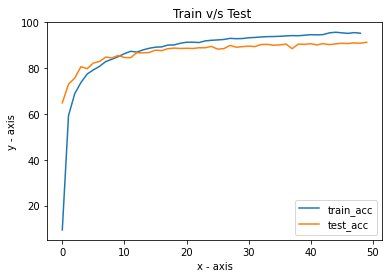

In [36]:

import matplotlib.pyplot as plt
plt.plot(xx, label = "train_acc")
# line 2 points

# plotting the line 2 points 
plt.plot(test_accuracy, label = "test_acc")
plt.xlabel('x - axis')
# Set the y axis label of the current axis.
plt.ylabel('y - axis')
# Set a title of the current axes.
plt.title('Train v/s Test ')
# show a legend on the plot
plt.legend()
plt.show()

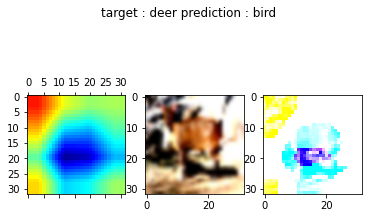

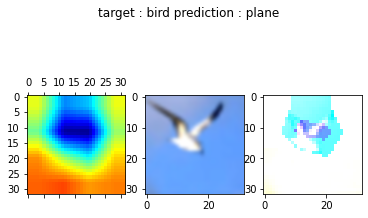

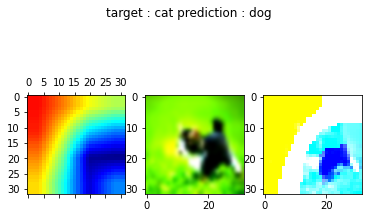

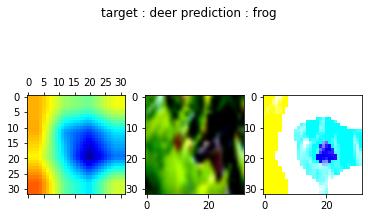

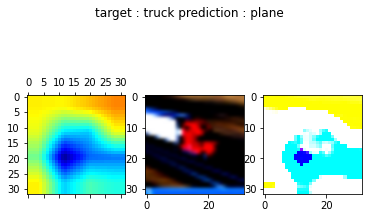

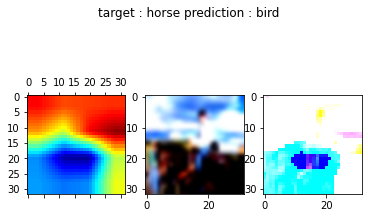

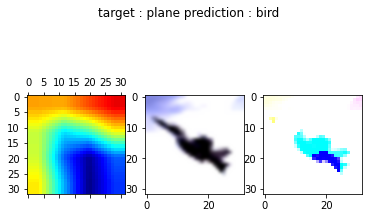

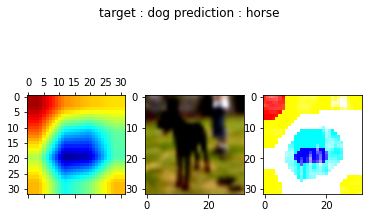

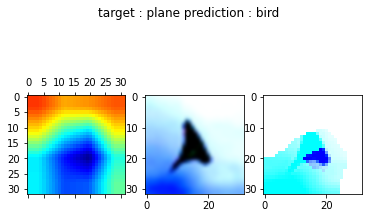

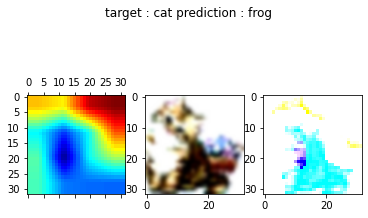

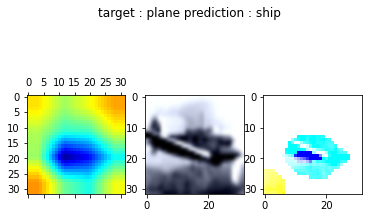

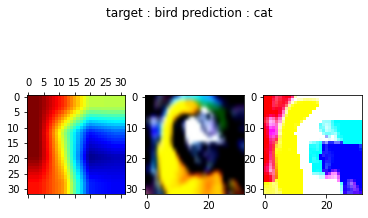

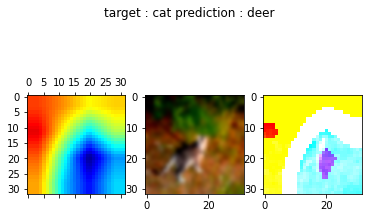

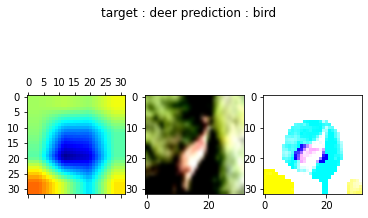

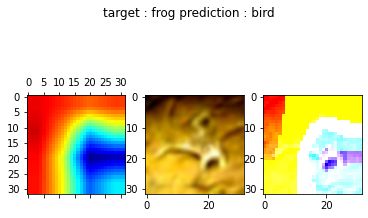

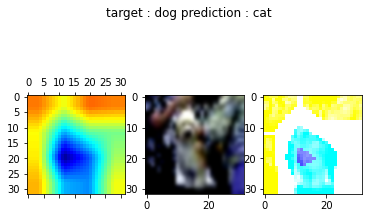

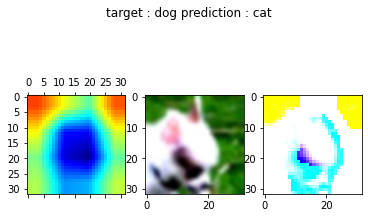

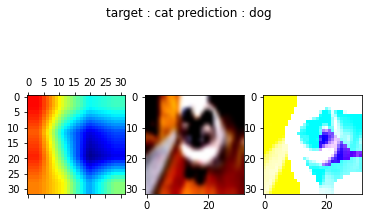

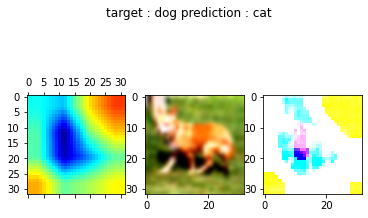

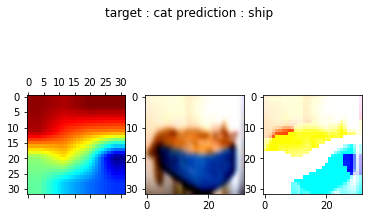

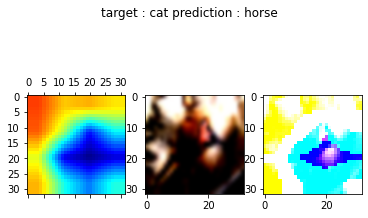

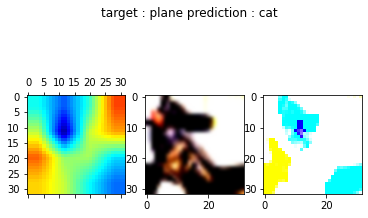

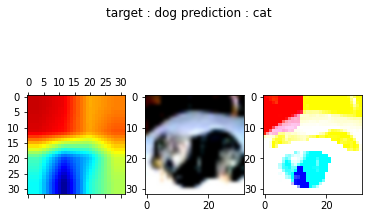

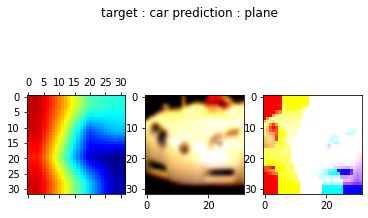

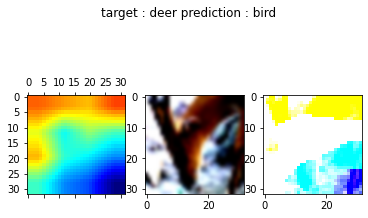

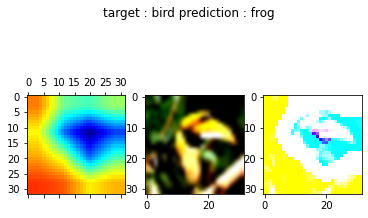

In [39]:

from model import gradcam
import importlib
import warnings
warnings.filterwarnings('ignore')
importlib.reload(gradcam)
importlib.reload(data_loader)
images  = iter(testloader)
count=0
while count<26:
  img,target  = next(images)
  # print(_)
  heat_map,is_correct,pred2 = gradcam.GradCam_(model,classes,img,device,target)
  if not is_correct:
    
    with warnings.catch_warnings():
      gradcam.plot1(img,heat_map,classes,target,pred2)
      count+=1

